# Intro
Code to interact with overture map geoparquet files.

In [12]:
overture_root = "../../data/overture/release"

In [13]:
!ls $overture_root/

theme=admins  theme=buildings  theme=places
theme=base    theme=divisions  theme=transportation


In [15]:
import geopandas as gpd
import pandas as pd
import os

In [3]:
gdf = gpd.read_parquet(overture_root+"/theme=places/type=place/part-00010-6cb89013-4ec2-4b94-8e4b-8e27c7d30865.c000.zstd.parquet")

gdf = gdf.cx[-125:-66, 24:50]

In [4]:
gdf.categories

2188516         {'main': 'accommodation', 'alternate': None}
2188517    {'main': 'seafood_restaurant', 'alternate': ['...
2188518    {'main': 'professional_services', 'alternate':...
2188519              {'main': 'mountain', 'alternate': None}
2188520              {'main': 'mountain', 'alternate': None}
                                 ...                        
2499995    {'main': 'community_services_non_profits', 'al...
2499996    {'main': 'elementary_school', 'alternate': ['s...
2499997        {'main': 'animal_shelter', 'alternate': None}
2499998     {'main': 'bar', 'alternate': ['cafe', 'lounge']}
2499999    {'main': 'pet_groomer', 'alternate': ['pet_ser...
Name: categories, Length: 303515, dtype: object

In [5]:
df = gdf.sample(20000)

In [6]:
df.head()

,id,geometry,bbox,subType,localityType,names,contextId,adminLevel,isoCountryCodeAlpha2,isoSubCountryCode,...,socials,emails,phones,brand,addresses,sourceTags,wikidata,surface,isSalt,isIntermittent
2445840,881654365319404,POINT (-102.43342 31.80906),"{'minx': -102.4334167, 'maxx': -102.4334167, '...",None,None,"{'common': [{'value': 'RFC Drilling, LLC', 'la...",None,NaN,None,None,...,[https://www.facebook.com/881654365319404],None,[+14322763505],None,"[{'freeform': '6001 W Murphy St', 'locality': ...",None,None,None,None,None
2227507,1125899910042513,POINT (-112.50840 33.49319),"{'minx': -112.508396, 'maxx': -112.508396, 'mi...",None,None,{'common': [{'value': 'Arizona Garage Builders...,None,NaN,None,None,...,None,None,[6232545599],None,"[{'freeform': 'Address: 20866 W. Werner Pl', '...",None,None,None,None,None
2211606,562949962898337,POINT (-117.72330 33.48610),"{'minx': -117.7233, 'maxx': -117.7233, 'miny':...",None,None,"{'common': [{'value': 'CVS Pharmacy', 'languag...",None,NaN,None,None,...,None,None,[9494899030],None,"[{'freeform': '32900 Pacific Coast Hwy', 'loca...",None,None,None,None,None
2422149,508472265969947,POINT (-111.97877 33.47983),"{'minx': -111.978773, 'maxx': -111.978773, 'mi...",None,None,"{'common': [{'value': 'Arcadia Shoe Repair', '...",None,NaN,None,None,...,[https://www.facebook.com/508472265969947],None,[+16029553555],None,"[{'freeform': '4747 E Thomas Rd', 'locality': ...",None,None,None,None,None
2224641,854534464664185,POINT (-116.35779 33.74306),"{'minx': -116.357786, 'maxx': -116.357786, 'mi...",None,None,{'common': [{'value': 'Cornisa Custom Woodwork...,None,NaN,None,None,...,[https://www.facebook.com/854534464664185],None,[+17603461709],None,"[{'freeform': '74866 Velie Way', 'locality': '...",None,None,None,None,None


In [35]:
gdf['main_cat'] = gdf['categories'].apply(lambda x: x['main'])

In [ ]:
gdf.columns

In [39]:
gdf.main_cat.unique()

array(['accommodation', 'seafood_restaurant', 'professional_services',
       ..., 'belgian_restaurant', 'skylight_installation', 'coach_bus'],
      dtype=object)

In [32]:
def extract_and_mark(row):
    # Start with the 'main' field
    result = {row['main']: True}
    # # Check if 'alternate' exists and is not None, then add them too
    # if row['alternate'] is not None:
    #     result.update({alt: True for alt in row['alternate']})
    return pd.Series(result)

# Apply the function and fill NaN with False
new_cols_df = df['categories'].apply(extract_and_mark).fillna(False)

/tmp/ipykernel_299021/1227891516.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_cols_df = df['categories'].apply(extract_and_mark).fillna(False)


In [33]:
new_cols_df

,bank_credit_union,contractor,professional_services,beauty_salon,tire_dealer_and_repair,pediatrician,atms,shopping,interior_design,life_coach,...,wedding_chapel,fish_and_chips_restaurant,human_resource_services,horse_trainer,fishing_club,health_coach,recording_and_rehearsal_studio,tui_na,eyelash_service,engine_repair_service
2294678,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2415424,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2484072,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2195629,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2221676,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2429219,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2363760,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2244025,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2311780,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
new_cols_df = pd.DataFrame(index=gdf.index)

In [ ]:
# Apply the function to the DataFrame column
gdf.loc[:,'names_value'] = gdf['names'].apply(lambda x: x['common'][0]['value'])
cont_us = gdf[['id','names_value','geometry']]

<Axes: >

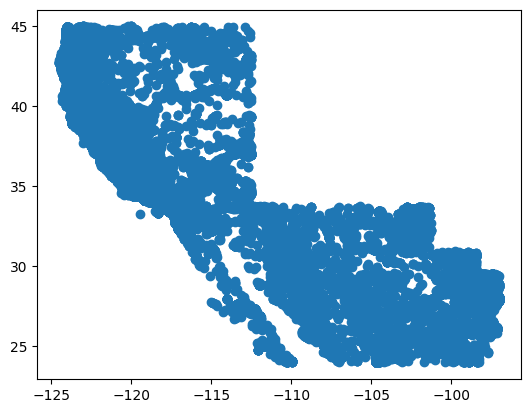

In [8]:
cont_us.plot()

In [29]:
del gdf

In [4]:
## process all the files

In [47]:
parquet_files = os.listdir(f"{overture_root}/theme=places/type=place")

res = []
for pf in parquet_files:
    gdf = gpd.read_parquet(f"{overture_root}/theme=places/type=place/{pf}")
    gdf = gdf.cx[-125:-66, 24:50]
    # Apply the function to the DataFrame column
    gdf.loc[:,'names_value'] = gdf['names'].apply(lambda x: x['common'][0]['value'])
    gdf.loc[:,'main_cat'] = gdf['categories'].apply(lambda x: x['main'])
    gdf = gdf[['id','names_value','main_cat','geometry']]
    res.append(gdf)

In [48]:
us_places = pd.concat(res)

In [49]:
us_places.shape

(13867406, 4)

In [50]:
us_places.crs = "EPSG:4326"

In [51]:
us_places.head()

,id,names_value,main_cat,geometry
1308150,49679874639,Back Alley Bakery,bakery,POINT (-98.38904 40.58494)
1308151,104889374747817,Smitty's MHP,campground,POINT (-98.38082 40.57477)
1308152,115690661823498,Hoskins Auto Sales,car_dealer,POINT (-98.39011 40.56764)
1308153,562949964809758,Edward Jones - Financial Advisor: Phil Nelson,None,POINT (-98.38725 40.58950)
1308154,133754580009931,South Central Behavioral Services,counseling_and_mental_health,POINT (-98.39292 40.57619)


In [52]:
us_places.to_file("../../data/overture/us_places.geojson")

In [57]:
us_places.groupby('main_cat').id.count().reset_index().sort_values('id',ascending=False).to_csv('../../data/overture/main_cat_count.csv',index=False)

In [58]:
us_places.to_parquet("../../data/overture/us_places.parquet")

## Roads

In [ ]:
glob.glob(f"{overture_root}/theme=transportation/type=segment/*.parquet")

In [48]:
segments = gpd.read_parquet('../../data/overture/release/theme=transportation/type=segment/part-00003-dac403ab-721e-4d34-aa21-dd1ce87757c4-c000.zstd.parquet')

In [56]:
segments.isna().sum()

id                              0
geometry                        0
bbox                            0
version                         0
update_time                     0
sources                       342
subtype                         0
names                     3274306
class                         109
connector_ids                   0
access_restrictions       5708808
level_rules               6578956
prohibited_transitions    6623454
road_surface              5477731
road_flags                6531911
speed_limits              6360544
width_rules               6588886
road                      4834861
dtype: int64

In [ ]:
segments['names_value'] = segments['names'].apply(lambda x: x['primary'])

In [58]:
res = []
for pf in glob.glob(f"{overture_root}/theme=transportation/type=segment/*.parquet"):
    gdf = gpd.read_parquet(pf)
    gdf = gdf.cx[-125:-66, 24:50]
    print(gdf.shape[0])
    # Apply the function to the DataFrame column
    gdf = pd.concat([gdf.drop(['bbox'], axis=1), gdf['bbox'].apply(pd.Series)], axis=1)
    #gdf.loc[:,'names_value'] = gdf['names'].apply(lambda x: x['common'][0]['value'])
    #gdf.loc[:,'main_cat'] = gdf['categories'].apply(lambda x: x['main'])
    gdf = gdf[['id','subtype','geometry']]
    res.append(gdf)

0
0
0
1827098
6621803
0
0
0
0
0
0
6580638
0
0
0
1614034
0
0
5556271
897000
0
0
0
0
6682945
0
0
0
0
0
0
0
0
6614226
0
0
0
0
6679809
0
6679574
0
0
0
0
6129215


In [59]:
us_segments = pd.concat(res)
us_segments.crs = "EPSG:4326"
us_segments.to_parquet("../../data/overture/us_segments.parquet")

## Buildings

In [36]:
import glob

In [ ]:
glob.glob(f"{overture_root}/theme=buildings/type=building/*.parquet")

In [16]:
parquet_files = os.listdir(f"{overture_root}/theme=buildings/type=building")

In [18]:
parquet_files

['part-00088-0f1e965c-d57d-4685-9f2a-0271285f7e34-c000.zstd.parquet',
 'part-00070-0f1e965c-d57d-4685-9f2a-0271285f7e34-c000.zstd.parquet',
 'part-00078-0f1e965c-d57d-4685-9f2a-0271285f7e34-c000.zstd.parquet',
 'part-00026-0f1e965c-d57d-4685-9f2a-0271285f7e34-c000.zstd.parquet',
 'part-00044-0f1e965c-d57d-4685-9f2a-0271285f7e34-c000.zstd.parquet',
 'part-00017-0f1e965c-d57d-4685-9f2a-0271285f7e34-c000.zstd.parquet',
 'part-00087-0f1e965c-d57d-4685-9f2a-0271285f7e34-c000.zstd.parquet',
 'part-00165-0f1e965c-d57d-4685-9f2a-0271285f7e34-c000.zstd.parquet',
 'part-00208-0f1e965c-d57d-4685-9f2a-0271285f7e34-c000.zstd.parquet',
 'part-00033-0f1e965c-d57d-4685-9f2a-0271285f7e34-c000.zstd.parquet',
 'part-00196-0f1e965c-d57d-4685-9f2a-0271285f7e34-c000.zstd.parquet',
 'part-00079-0f1e965c-d57d-4685-9f2a-0271285f7e34-c000.zstd.parquet',
 'part-00191-0f1e965c-d57d-4685-9f2a-0271285f7e34-c000.zstd.parquet',
 'part-00102-0f1e965c-d57d-4685-9f2a-0271285f7e34-c000.zstd.parquet',
 'part-00062-0f1e965

In [20]:
bldg = gpd.read_parquet("../../data/overture/release/theme=buildings/type=building/part-00004-0f1e965c-d57d-4685-9f2a-0271285f7e34-c000.zstd.parquet")

In [27]:
bldg[bldg.bbox.isna()]

,id,geometry,bbox,version,update_time,sources,subtype,names,class,level,...,min_height,min_floor,facade_color,facade_material,roof_material,roof_shape,roof_direction,roof_orientation,roof_color,roof_height


In [32]:
bldg = pd.concat([bldg.drop(['bbox'], axis=1), bldg['bbox'].apply(pd.Series)], axis=1)

In [33]:
bldg.shape

(11458746, 26)

In [34]:
bldg.head()

,id,geometry,version,update_time,sources,subtype,names,class,level,has_parts,...,roof_material,roof_shape,roof_direction,roof_orientation,roof_color,roof_height,xmin,xmax,ymin,ymax
0,08ba901759a6bfff0200ef5430350689,"POLYGON ((-51.06069 -30.09087, -51.06071 -30.0...",0,2024-06-10T07:15:57.887Z,"[{'property': '', 'dataset': 'Google Open Buil...",None,None,None,NaN,False,...,None,None,NaN,None,None,NaN,-51.060780,-51.060692,-30.090895,-30.090826
1,08ba901664d36fff020092778f206858,"POLYGON ((-51.06093 -30.09070, -51.06097 -30.0...",0,2024-06-10T07:15:57.887Z,"[{'property': '', 'dataset': 'Google Open Buil...",None,None,None,NaN,False,...,None,None,NaN,None,None,NaN,-51.061043,-51.060928,-30.090729,-30.090612
2,08ba901664d36fff0200b2af8f83c7f8,"POLYGON ((-51.06093 -30.09059, -51.06092 -30.0...",0,2024-06-10T07:15:57.887Z,"[{'property': '', 'dataset': 'Microsoft ML Bui...",None,None,None,NaN,False,...,None,None,NaN,None,None,NaN,-51.060932,-51.060825,-30.090694,-30.090580
3,08ba901664d32fff02005e1a3a04dec9,"POLYGON ((-51.06096 -30.09060, -51.06090 -30.0...",0,2024-06-10T07:15:57.887Z,"[{'property': '', 'dataset': 'Microsoft ML Bui...",None,None,None,NaN,False,...,None,None,NaN,None,None,NaN,-51.060986,-51.060894,-30.090599,-30.090494
4,08ba901664d32fff02007184a7871b55,"POLYGON ((-51.06091 -30.09055, -51.06089 -30.0...",0,2024-06-10T07:15:57.887Z,"[{'property': '', 'dataset': 'Microsoft ML Bui...",None,None,None,NaN,False,...,None,None,NaN,None,None,NaN,-51.060913,-51.060814,-30.090586,-30.090528


In [29]:
bldg.iloc[0].bbox

{'xmin': -51.0607795715332,
 'xmax': -51.060691833496094,
 'ymin': -30.09089469909668,
 'ymax': -30.0908260345459}

In [ ]:
bldg.query("xmin > -66")

In [35]:
bldg.cx[-125:-66, 24:50]

,id,geometry,version,update_time,sources,subtype,names,class,level,has_parts,...,roof_material,roof_shape,roof_direction,roof_orientation,roof_color,roof_height,xmin,xmax,ymin,ymax


In [57]:
del bldg

In [41]:
res = []
for pf in glob.glob(f"{overture_root}/theme=buildings/type=building/*.parquet"):
    gdf = gpd.read_parquet(pf)
    gdf = gdf.cx[-125:-66, 24:50]
    print(gdf.shape[0])
    # Apply the function to the DataFrame column
    gdf = pd.concat([gdf.drop(['bbox'], axis=1), gdf['bbox'].apply(pd.Series)], axis=1)
    #gdf.loc[:,'names_value'] = gdf['names'].apply(lambda x: x['common'][0]['value'])
    #gdf.loc[:,'main_cat'] = gdf['categories'].apply(lambda x: x['main'])
    gdf = gdf[['id','geometry']]
    res.append(gdf)

0
0
0
11225866
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
11419136
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
5081794
0
0
0
0
11435373
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
11376765
0
0
0
0
0
0
0
0
11134307
0
0
0
0
0
11576059
0
0
0
0
0
669505
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
42599
0
0
0
0
9389198
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
6685750
0
0
0
0
11540405
0
0
0
0
0
0
0
0
0
0
0
0
0
10557099
0
4399225
0
0
0
0
0
0
0
0
0
11466786
0
0
0
0
0
0
0
0
0
0
0
0
0
0
11530814
0
0
0
0
0
0
0
0
0
0
0
0
11439591
11495131
4758385
11438669
0
0
0
0
0
0
0
0
0
0
0
0


In [42]:
us_bldg = pd.concat(res)
us_bldg.crs = "EPSG:4326"
us_bldg.to_parquet("../../data/overture/us_buildings.parquet")

In [45]:
us_bldg.sample(10000).to_parquet("../../data/overture/us_buildings_10k.parquet")